In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn import metrics

2023-02-11 21:28:51.360408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 21:28:51.587037: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-11 21:28:51.595029: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-11 21:28:51.595068: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
df = pd.read_csv("./data/AMZN.csv")

In [3]:
#2012-01-01 to 2016-11-07

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [5]:
prediction_days = 60

X=[]
y=[]

In [6]:
for i in range(prediction_days, len(scaled_data)):
    X.append(scaled_data[i-prediction_days:i, 0])
    y.append(scaled_data[i, 0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

2023-02-11 21:28:55.333832: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-11 21:28:55.333872: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-11 21:28:55.333899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HallowNest): /proc/driver/nvidia/version does not exist
2023-02-11 21:28:55.334280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
140/140 [==============================] - 24s 103ms/step - loss: 0.0038
Epoch 2/25
140/140 [==============================] - 14s 103ms/step - loss: 0.0015
Epoch 3/25
140/140 [==============================] - 15s 104ms/step - loss: 0.0013
Epoch 4/25
140/140 [==============================] - 15s 104ms/step - loss: 0.0014
Epoch 5/25
140/140 [==============================] - 15s 104ms/step - loss: 0.0014
Epoch 6/25
140/140 [==============================] - 15s 104ms/step - loss: 9.8411e-04
Epoch 7/25
140/140 [==============================] - 15s 105ms/step - loss: 0.0012
Epoch 8/25
140/140 [==============================] - 15s 104ms/step - loss: 9.0322e-04
Epoch 9/25
140/140 [==============================] - 15s 104ms/step - loss: 8.8491e-04
Epoch 10/25
140/140 [==============================] - 15s 104ms/step - loss: 8.8561e-04
Epoch 11/25
140/140 [==============================] - 15s 104ms/step - loss: 8.1672e-04
Epoch 12/25
140/140 [==============================] -

In [11]:
X_test, y_test= np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
predicted_prices=model.predict(X_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

60/60 [==============================] - 4s 34ms/step


In [13]:
y_test=scaler.inverse_transform(y_test.reshape(-1, 1))

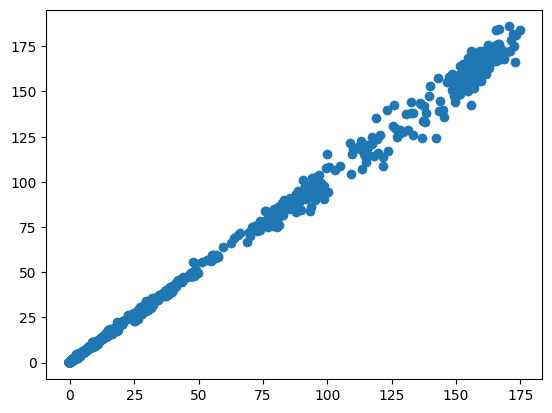

In [14]:
plt.scatter(predicted_prices,y_test)

In [15]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_prices)))

RMSE: 2.7730870159462375


In [25]:
len(scaled_data)

6438

In [79]:
import random
n=random.randint(60,df.shape[0])

demo=[]

demo.append(scaled_data[n-prediction_days:n, 0])

demo=np.array(demo)
demo = np.reshape(demo, (demo.shape[0], demo.shape[1], 1))

predicted_price=model.predict(demo)
predicted_price=scaler.inverse_transform(predicted_price)

print("%.3f"%df.iloc[n]['Close'])
print("%.3f"%predicted_price)

print(predicted_price/df.iloc[n]['Close'])

1/1 [==============================] - 0s 50ms/step
7.652
6.941
[[0.90719247]]
